## Low Pass filter on CSV, in Scala

In [1]:
//import coursier.MavenRepository
import coursierapi._
import coursier._

interp.repositories() ++= Seq(
  MavenRepository.of("https://nexus.corp.com/content/repositories/releases")
)
interp.repositories() ++= Seq(
  MavenRepository.of("https://maven.imagej.net/content/repositories/public/")
)
interp.repositories() ++= Seq(
  MavenRepository.of("https://dl.bintray.com/cibotech/public")
)
interp.load.ivy("com.cibo" %% "evilplot-repl" % "0.8.0")
// import $ivy.`com.cibo::evilplot-repl:0.8.0`

Downloaded https://repo1.maven.org/maven2/com/cibo/evilplot-repl_2.13/0.8.0/evilplot-repl_2.13-0.8.0.pom
Downloaded https://repo1.maven.org/maven2/com/cibo/evilplot-repl_2.13/0.8.0/evilplot-repl_2.13-0.8.0.pom.sha1
Downloaded https://nexus.corp.com/content/repositories/releases/com/cibo/evilplot-repl_2.13/0.8.0/evilplot-repl_2.13-0.8.0.pom
Downloaded https://nexus.corp.com/content/repositories/releases/com/cibo/evilplot-repl_2.13/0.8.0/evilplot-repl_2.13-0.8.0.pom.sha1
Downloaded https://maven.imagej.net/content/repositories/public/com/cibo/evilplot-repl_2.13/0.8.0/evilplot-repl_2.13-0.8.0.pom
Downloaded https://maven.imagej.net/content/repositories/public/com/cibo/evilplot-repl_2.13/0.8.0/evilplot-repl_2.13-0.8.0.pom.sha1
Downloaded https://dl.bintray.com/cibotech/public/com/cibo/evilplot-repl_2.13/0.8.0/evilplot-repl_2.13-0.8.0.pom
Downloaded https://repo1.maven.org/maven2/com/cibo/evilplot_2.13/0.8.0/evilplot_2.13-0.8.0.pom
Downloaded https://repo1.maven.org/maven2/com/cibo/evilplot

Downloaded https://repo1.maven.org/maven2/com/github/wendykierp/JTransforms/3.1/JTransforms-3.1.pom
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/all/1.1.2/all-1.1.2.pom
Downloaded https://repo1.maven.org/maven2/org/typelevel/cats-macros_2.13/2.1.0/cats-macros_2.13-2.1.0.pom
Downloaded https://repo1.maven.org/maven2/org/typelevel/jawn-parser_2.13/1.0.0/jawn-parser_2.13-1.0.0.pom
Downloaded https://repo1.maven.org/maven2/org/slf4j/slf4j-api/1.7.5/slf4j-api-1.7.5.pom
Downloaded https://repo1.maven.org/maven2/org/typelevel/spire_2.13/0.17.0-M1/spire_2.13-0.17.0-M1.pom
Downloaded https://repo1.maven.org/maven2/org/apache/commons/commons-math3/3.2/commons-math3-3.2.pom
Downloaded https://repo1.maven.org/maven2/org/scalanlp/breeze-macros_2.13/1.0/breeze-macros_2.13-1.0.pom
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/parent/1.1/parent-1.1.pom
Downloaded https://repo1.maven.org/maven2/org/slf4j/slf4j-parent/1.7.5/slf4j-parent-1.7.5.pom
Downloaded htt

Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/native_ref-java/1.1/native_ref-java-1.1.pom
Downloaded https://repo1.maven.org/maven2/com/github/fommil/jniloader/1.1/jniloader-1.1.pom
Downloaded https://dl.bintray.com/cibotech/public/com/cibo/evilplot-math_2.13/0.8.0/evilplot-math_2.13-0.8.0-sources.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/netlib-native_system-linux-armhf/1.1/netlib-native_system-linux-armhf-1.1-sources.jar
Downloaded https://repo1.maven.org/maven2/org/typelevel/machinist_2.13/0.6.8/machinist_2.13-0.6.8.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/netlib-native_ref-linux-armhf/1.1/netlib-native_ref-linux-armhf-1.1-sources.jar
Downloaded https://repo1.maven.org/maven2/org/typelevel/jawn-parser_2.13/1.0.0/jawn-parser_2.13-1.0.0-sources.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/native_system-java/1.1/native_system-java-1.1-sources.jar
Downloaded https://repo1.maven.org/

Downloaded https://repo1.maven.org/maven2/org/apache/commons/commons-math3/3.5/commons-math3-3.5.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/netlib-native_ref-win-i686/1.1/netlib-native_ref-win-i686-1.1-natives.jar
Downloaded https://repo1.maven.org/maven2/org/typelevel/spire-platform_2.13/0.17.0-M1/spire-platform_2.13-0.17.0-M1.jar
Downloaded https://repo1.maven.org/maven2/io/circe/circe-parser_2.13/0.13.0/circe-parser_2.13-0.13.0-sources.jar
Downloaded https://repo1.maven.org/maven2/org/typelevel/spire-util_2.13/0.17.0-M1/spire-util_2.13-0.17.0-M1.jar
Downloaded https://repo1.maven.org/maven2/net/sourceforge/f2j/arpack_combined_all/0.1/arpack_combined_all-0.1.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/netlib-native_system-win-x86_64/1.1/netlib-native_system-win-x86_64-1.1-natives.jar
Downloaded https://repo1.maven.org/maven2/org/typelevel/cats-core_2.13/2.1.0/cats-core_2.13-2.1.0-sources.jar
Downloaded https://repo1.maven.org/mav

Downloaded https://repo1.maven.org/maven2/net/sourceforge/f2j/arpack_combined_all/0.1/arpack_combined_all-0.1-sources.jar
Downloaded https://repo1.maven.org/maven2/org/typelevel/jawn-parser_2.13/1.0.0/jawn-parser_2.13-1.0.0.jar
Downloaded https://repo1.maven.org/maven2/com/github/wendykierp/JTransforms/3.1/JTransforms-3.1-sources.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/netlib-native_system-win-x86_64/1.1/netlib-native_system-win-x86_64-1.1-sources.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/netlib-native_system-linux-armhf/1.1/netlib-native_system-linux-armhf-1.1-natives.jar
Downloaded https://repo1.maven.org/maven2/org/typelevel/spire_2.13/0.17.0-M1/spire_2.13-0.17.0-M1.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/netlib-native_system-win-i686/1.1/netlib-native_system-win-i686-1.1-sources.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/netlib-native_system-win-i686/1.1/netlib-nat

import coursierapi._

import coursier._



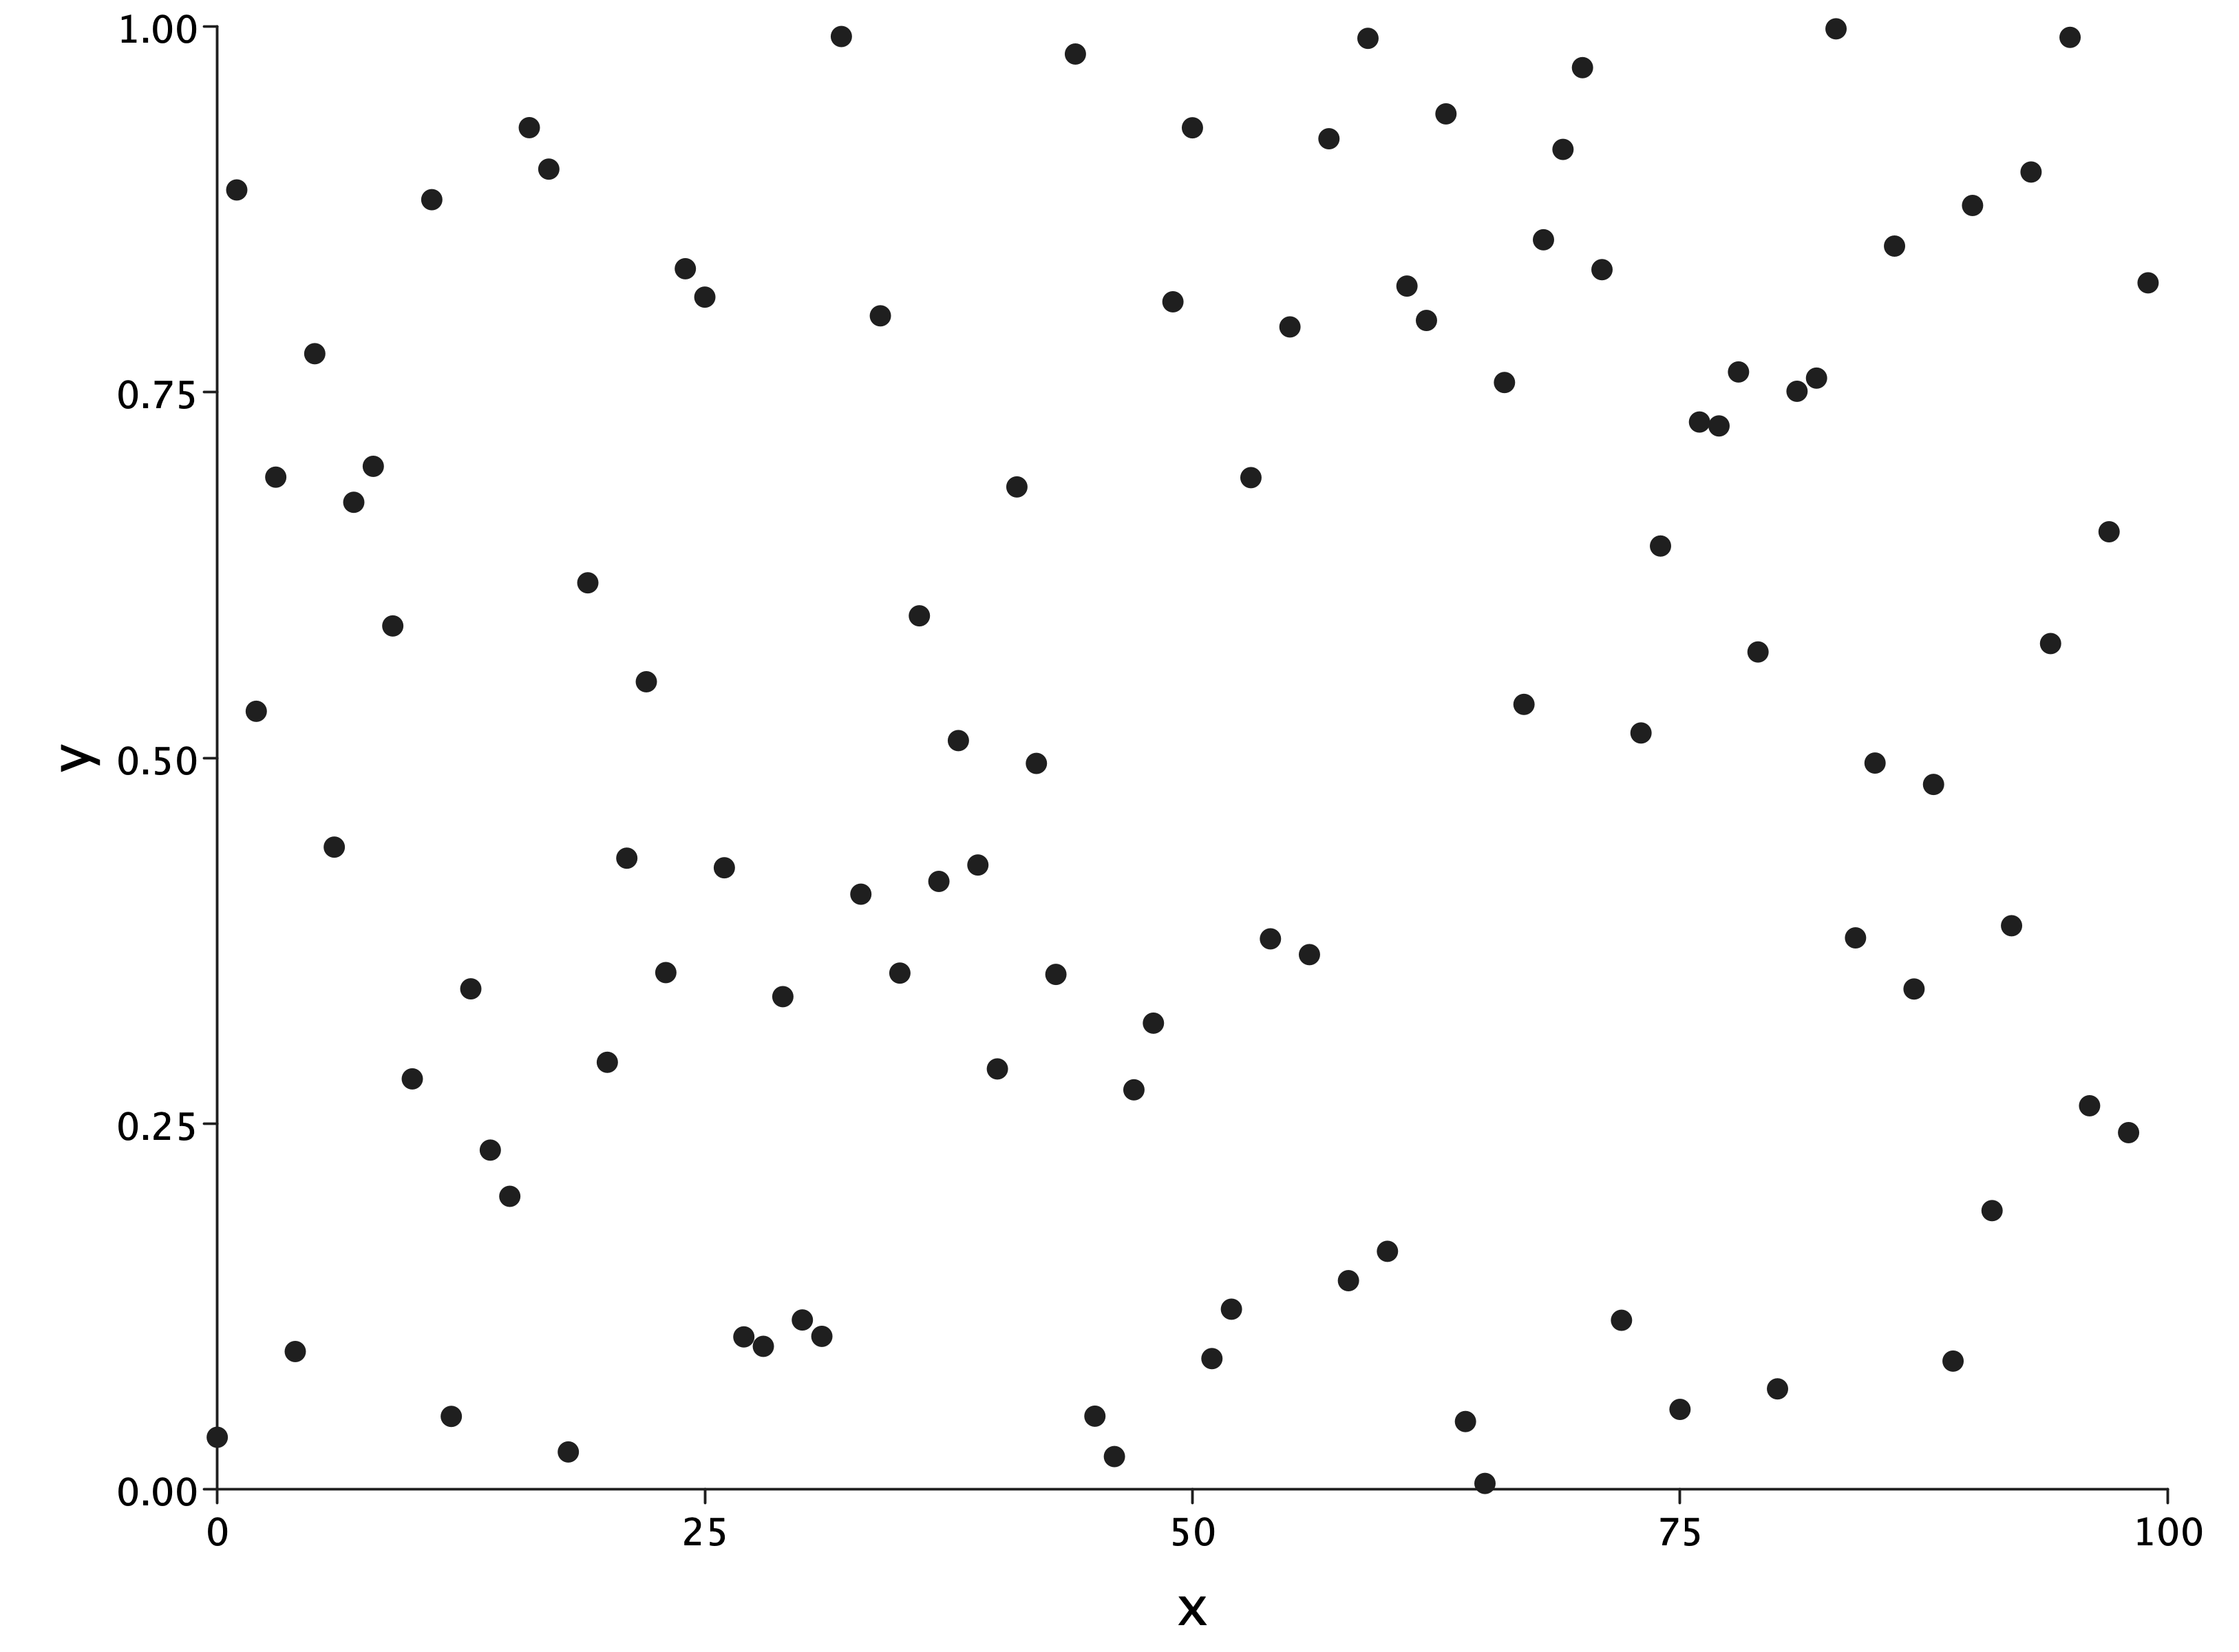

import com.cibo.evilplot.plot._

import com.cibo.evilplot.plot.aesthetics.DefaultTheme._

import com.cibo.evilplot.numeric.Point

data: Seq[Point] = List(
  Point(0.0, 0.03568027263780227),
  Point(1.0, 0.8883643207531672),
  Point(2.0, 0.5319676571229744),
  Point(3.0, 0.6920294222327511),
  Point(4.0, 0.09429388977434783),
  Point(5.0, 0.7764259737109583),
  Point(6.0, 0.43912048335053855),
  Point(7.0, 0.6748387863393539),
  Point(8.0, 0.6994288584505134),
  Point(9.0, 0.5903169730541995),
  Point(10.0, 0.28068434346302673),
  Point(11.0, 0.8817155117399615),
  Point(12.0, 0.04994231256750303),
  Point(13.0, 0.3422275038864424),
  Point(14.0, 0.23199148294957805),
  Point(15.0, 0.20039561741719192),
  Point(16.0, 0.9309428015142094),
  Point(17.0, 0.9026075805387638),
  Point(18.0, 0.025647783579043404),
  Point(19.0, 0.6197973936364293),
  Point(20.0, 0.29202448504025147),
  Point(21.0, 0.4315603143621891),
  Point(22.0, 0.5521654470695977),
  Point(23.0, 0.35334210248909825),
  Po

In [4]:
import com.cibo.evilplot.plot._
import com.cibo.evilplot.plot.aesthetics.DefaultTheme._
import com.cibo.evilplot.numeric.Point
val data = Seq.tabulate(100) { i =>
  Point(i.toDouble, scala.util.Random.nextDouble())
}
val plot = ScatterPlot(data)
  .xAxis()
  .yAxis()
  .frame()
  .xLabel("x")
  .yLabel("y")
  .render()


def showPlot(plot: com.cibo.evilplot.geometry.Drawable) =
  Image.fromRenderedImage(plot.asBufferedImage, Image.PNG)


showPlot(plot)


In [2]:
import scala.collection.mutable
import scala.util.Random

import scala.collection.mutable

import scala.util.Random

Set the filter's parameter and accumulator

In [34]:
val DATA_FILE = "./max.gust.csv"
val ALPHA = 0.15f // For the low pass filter (smoothing)
var accumulator:Double = 0

DATA_FILE: String = "./max.gust.csv"
ALPHA: Float = 0.15F
accumulator: Double = 51.47269113385271

Define the **filter** function

In [35]:
def lowPass(alpha: Double, value: Double, acc: Double) = (value * alpha) + (acc * (1d - alpha))

defined function lowPass

In [36]:
var doubleData = new mutable.ListBuffer[Double]()

doubleData: mutable.ListBuffer[Double] = ListBuffer()

Populate the data list

In [37]:
val bufferedSource = io.Source.fromFile(DATA_FILE)
var lineNo = 0
try {
for (line <- bufferedSource.getLines) {
    lineNo += 1;
    val cols = line.split(",").map(_.trim)
    // do whatever you want with the columns here
    // println(s"${cols(0)}|${cols(1)}|${cols(2)}|${cols(3)}")
    if (lineNo > 1) {
        // Add cols(2), gust
        doubleData += cols(2).toDouble
    }
}
} catch {
    case ioe: java.io.IOException => {
        // Stream exhausted
    }
    case ex: Exception => ex.printStackTrace()
} finally {
    println("Closing the stream")
    try {
        // bufferedSource.close
    } catch {
    case ioe: java.io.IOException => {
        // Stream closed already
    }
    case ex: Exception => ex.printStackTrace()
    }
}
println(s"Raw Data: $doubleData")

Closing the stream
Raw Data: ListBuffer(8.16, 3.42, 3.04, 7.1, 6.02, 8.83, 11.2, 10.31, 5.4, 6.73, 12.11, 10.3, 12.85, 13.55, 16.34, 17.64, 14.22, 20.77, 23.39, 24.92, 26.78, 26.45, 24.86, 17.31, 30.63, 20.08, 23.54, 23.05, 24.44, 22.13, 22.89, 23.14, 26.06, 25.69, 21.38, 26.38, 19.59, 22.67, 23.09, 17.82, 15.68, 14.98, 9.61, 10.79, 10.57, 9.11, 13.67, 12.52, 13.31, 13.49, 14.73, 14.28, 13.85, 15.49, 12.51, 13.57, 11.01, 10.75, 11.09, 11.73, 8.59, 9.79, 7.44, 9.47, 9.69, 8.01, 6.94, 7.45, 6.31, 5.44, 4.73, 6.25, 8.62, 8.06, 6.75, 6.49, 7.55, 5.65, 5.82, 5.47, 4.48, 4.8, 5.37, 6.34, 4.84, 3.45, 2.66, 3.0, 3.81, 4.43, 7.65, 11.41, 13.62, 12.33, 11.42, 12.81, 14.41, 12.91, 14.01, 12.17, 8.42, 9.0, 2.9, 6.99, 12.19, 13.32, 18.56, 9.73, 12.83, 14.4, 11.62, 5.66, 0.0, 6.8, 8.82, 8.25, 12.0, 11.67, 13.93, 14.67, 11.79, 13.79, 13.27, 13.34, 15.24, 16.45, 12.3, 12.98, 9.02, 8.19, 8.35, 13.69, 12.13, 13.48, 19.78, 21.71, 17.44, 15.33, 19.86, 17.19, 22.38, 21.57, 27.41, 22.39, 22.35, 24.42, 52.6,

bufferedSource: io.BufferedSource = empty iterator
lineNo: Int = 1006

Filter and smooth it!

In [38]:
var filteredData = new mutable.ListBuffer[Double]()
doubleData.foreach(d => {
    accumulator = lowPass(ALPHA, d, accumulator)
    filteredData += accumulator
})
println(s"Filtered: $filteredData")

Filtered: ListBuffer(1.22400004863739, 1.5534000544309614, 1.7763900551271434, 2.57493157858926, 3.091691862335079, 3.952438117187799, 5.039572442808464, 5.830136607801391, 5.7656161140673685, 5.910273702705439, 6.840232684252872, 7.3591978022367615, 8.18281816462898, 8.98789547192553, 10.090711194958658, 11.223104560712128, 11.672638894468198, 13.037243114522466, 14.590156709051337, 16.1396332642643, 17.735688338046184, 19.0428351392806, 19.915409903061516, 19.524598402072833, 21.190408707955257, 21.023847395143413, 21.40127030086934, 21.648579765566133, 22.067292817369374, 22.07669889513773, 22.198694065714726, 22.33988996146814, 22.8979064894215, 23.31672053265045, 23.026212441209125, 23.529280595017887, 22.938388482285262, 22.898130208342756, 22.926910678234975, 22.16087404606017, 21.188742900522126, 20.257431428436817, 18.660316650707657, 17.479769106190766, 16.44330369907672, 15.343308100505315, 15.092311875455824, 14.706465078805277, 14.496995308660903, 14.345946006359608, 14.40

8386, 30.707822737780187, 31.405649354842296, 31.817301967973556, 33.79320675129292, 35.0962257903763, 36.034291959095256, 36.47914818290796, 36.72827596537122, 38.204534629226785, 39.66335449281106, 40.05735133454542, 40.19424863980342, 39.96261133462847, 39.18821960366264, 38.942486653348695, 38.112613622370205, 37.75372156475358, 37.204163308203064, 37.326538816835374, 36.560557963872725, 37.020974287587116, 37.22482815254947, 37.335103934049016, 36.91433832722194, 37.33968759504051, 37.7927344737869, 38.261824321358816, 37.83255065609719, 38.44116808186689, 38.21149286046038, 38.769268953555354, 38.51587860045323, 37.517496770713116, 36.104872198973496, 34.865141319864996, 35.465870145756064, 33.87198956055753, 32.30119106405598, 31.06801235544546, 29.640310445396867, 27.867263808132794, 26.81017419490791, 25.29964800564881, 24.05470075533173, 22.96499559873098, 21.8482462145457, 20.729509237909234, 20.122082828085894, 19.947770396946456, 19.328604812801057, 19.567314100366353, 19.

4514405, 46.3377930835655, 47.38662416270748, 46.30713049540613, 46.09006091246964, 46.933051809096646, 47.241594049992514, 46.455354911251305, 48.29355174760698, 46.3340189076011, 43.28691595037994, 42.91537854305938, 45.46757186301552, 46.92143614133457, 50.47772086144844, 49.4595626917732, 50.71212833777971, 53.66980920464043, 55.99033791615389, 58.240287318135756, 60.35374430439663, 59.88218263999896, 61.528855309432004, 62.5220270524823, 64.3697230680308, 65.08826463637845, 66.58852500053668, 68.16974631328826, 69.91578443567634, 70.11891677839665, 71.54107931814882, 72.63291746381225, 73.45597987694597, 72.94808287522207, 73.05487044818211, 71.47163981804286, 72.62189389104341, 73.50810984260195, 74.35739339995916, 74.98178441477636, 75.62801677823887, 76.20881428458186, 76.59149215710083, 76.62726833495732, 76.97417809849867, 77.28705139615634, 77.57249369807535, 77.88711965586616, 78.04805171388111, 76.74334390495451, 77.09984233337731, 76.55386596167557, 71.22078585550668, 69.

filteredData: mutable.ListBuffer[Double] = ListBuffer(
  1.22400004863739,
  1.5534000544309614,
  1.7763900551271434,
  2.57493157858926,
  3.091691862335079,
  3.952438117187799,
  5.039572442808464,
  5.830136607801391,
  5.7656161140673685,
  5.910273702705439,
  6.840232684252872,
  7.3591978022367615,
  8.18281816462898,
  8.98789547192553,
  10.090711194958658,
  11.223104560712128,
  11.672638894468198,
  13.037243114522466,
  14.590156709051337,
  16.1396332642643,
  17.735688338046184,
  19.0428351392806,
  19.915409903061516,
  19.524598402072833,
  21.190408707955257,
  21.023847395143413,
  21.40127030086934,
  21.648579765566133,
  22.067292817369374,
  22.07669889513773,
  22.198694065714726,
  22.33988996146814,
  22.8979064894215,
  23.31672053265045,
  23.026212441209125,
  23.529280595017887,
  22.938388482285262,
  22.898130208342756,
...